# Decision Trees & Random Forest

## Titanic Dataset

In [3]:
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn import tree
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv("titanic.csv")
test_df = pd.read_csv("titanic_test.csv")

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_df["Sex"] = train_df["Sex"].apply(lambda sex: 0 if sex == 'male' else 1)

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [7]:
y = targets = labels = train_df["Survived"].values

columns = ["Pclass", "Sex", "Age", "SibSp"]
features = train_df[list(columns)].values
features

array([[ 3.,  0., 22.,  1.],
       [ 1.,  1., 38.,  1.],
       [ 3.,  1., 26.,  0.],
       ...,
       [ 3.,  1., nan,  1.],
       [ 1.,  0., 26.,  0.],
       [ 3.,  0., 32.,  0.]])

In [8]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = imp.fit_transform(features)
X

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 3.        ,  0.        , 22.        ,  1.        ],
       [ 1.        ,  1.        , 38.        ,  1.        ],
       [ 3.        ,  1.        , 26.        ,  0.        ],
       ...,
       [ 3.        ,  1.        , 29.69911765,  1.        ],
       [ 1.        ,  0.        , 26.        ,  0.        ],
       [ 3.        ,  0.        , 32.        ,  0.        ]])

In [9]:
my_tree_one = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
my_tree_one = my_tree_one.fit(X, y)

In [10]:
my_tree_one

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
#The feature_importances_ attribute make it simple to interpret the significance of the predictors you include
print(my_tree_one.feature_importances_) 
print(my_tree_one.score(X, y))
list(zip(columns,my_tree_one.feature_importances_))

[0.2662738  0.60911193 0.12461427 0.        ]
0.8069584736251403


[('Pclass', 0.26627379767117476),
 ('Sex', 0.6091119294962372),
 ('Age', 0.12461427283258814),
 ('SibSp', 0.0)]

In [13]:
with open("titanic.dot", 'w') as f:
    f = tree.export_graphviz(my_tree_one, out_file=f, feature_names=columns)

#### visit http://webgraphviz.com/  to visualize the tree

In [14]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
test_df["Sex"] = test_df["Sex"].apply(lambda sex: 0 if sex == 'male' else 1)
#features_test = train_df[list(columns)].values
features_test = test_df[list(columns)].values
imp_test = Imputer(missing_values='NaN', strategy='mean', axis=0)
X_test = imp_test.fit_transform(features_test)
X_test

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 3.        ,  0.        , 34.5       ,  0.        ],
       [ 3.        ,  1.        , 47.        ,  1.        ],
       [ 2.        ,  0.        , 62.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 38.5       ,  0.        ],
       [ 3.        ,  0.        , 30.27259036,  0.        ],
       [ 3.        ,  0.        , 30.27259036,  1.        ]])

In [16]:
pred = my_tree_one.predict(X_test)
pred


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
#Print Confusion matrix 
pred = my_tree_one.predict(X)
df_confusion = metrics.confusion_matrix(y, pred)
df_confusion

array([[467,  82],
       [ 90, 252]], dtype=int64)

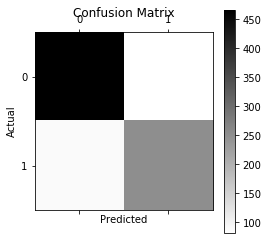

In [18]:

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)

#### What happen when we change the tree depth?

In [19]:
#Setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 10
min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)
my_tree_two = my_tree_two.fit(X, y)

#Print the score of the new decison tree
print(my_tree_two.score(X, y))
print(my_tree_one.score(X,y))

0.8698092031425365
0.8069584736251403


In [20]:
pred = my_tree_two.predict(X)

In [21]:
df_confusion = metrics.confusion_matrix(y, pred)
df_confusion

array([[511,  38],
       [ 78, 264]], dtype=int64)

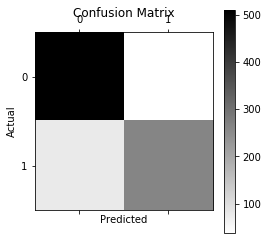

In [22]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)

#### Try by yourself

In [23]:
# Add new feature and then train the model

train_df["family_size"] = train_df.SibSp + train_df.Parch + 1


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(X, y)

# Print the score of the fitted random forest
print(my_forest.score(X, y))


0.9001122334455668


In [25]:

pred = my_forest.predict(X)

In [26]:
print(my_forest.feature_importances_)
list(zip(columns,my_forest.feature_importances_))

[0.15563664 0.39584443 0.37593752 0.07258141]


[('Pclass', 0.15563663936098054),
 ('Sex', 0.39584442870450576),
 ('Age', 0.37593752393053415),
 ('SibSp', 0.07258140800397943)]

In [27]:
df_confusion = metrics.confusion_matrix(y, pred)
df_confusion

array([[518,  31],
       [ 58, 284]], dtype=int64)

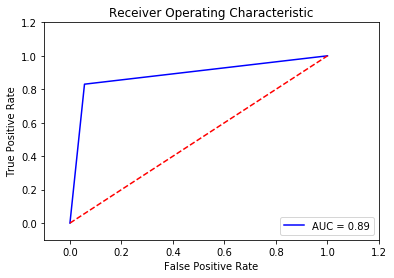

In [28]:
fpr, tpr, _ = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

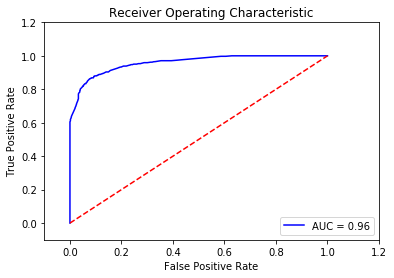

In [29]:
# ROC curve on Predicted probabilities
pred_proba = my_forest.predict_proba(X)
fpr, tpr, _ = metrics.roc_curve(y, pred_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()